# Due data 30th April, Friday


# Index
* [Project Setup](#Setup)
  * [Loading Data](#Loading-Data)
  * [Data Preprocessing](#Data-Preperation)
  * [Quick Setup](#Start-Here---Personal-Setup)
* [Model Training](#Models)
  * [SVM](#SVM)
  * [Random Forest](#Random-Forest)
  * [Neural Network](#Neural-Network)
* [Model Evaluation Visualisations](#Model-Evaluation-Visualisations)
    * [Roc](#Roc)
    * [Learn Rate](#Learn-Rate)
    * [idk](#idk)
    * [idk2](#idk2)

# Setup

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer, cohen_kappa_score
from statistics import mean

from sklearn.utils.multiclass import unique_labels

from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier 

# Loading Data
- [Back To Top](#Index)

In [2]:
# load data for train split instead
train_FNC = pd.read_csv('../../../../mlsp-2014-mri/Train/train_FNC.csv', delimiter=',')
train_SBM = pd.read_csv('../../../../mlsp-2014-mri/Train/train_SBM.csv', delimiter=',')
train_labels = pd.read_csv(  '../../../../mlsp-2014-mri/Train/train_labels.csv', delimiter=',')

test_FNC = pd.read_csv('../../../../mlsp-2014-mri/Test/test_FNC.csv', delimiter=',')
test_SBM = pd.read_csv('../../../../mlsp-2014-mri/Test/test_SBM.csv', delimiter=',')
print('Data load complete')

Data load complete


# Data Preperation
- [Back To Top](#Index)

In [90]:
# Merge data
# Train data
data = pd.merge(train_FNC, train_SBM)
data_2 = pd.merge(data, train_labels)
data_2.to_csv('amalgamated_train_data.csv', index=False)
train_data = pd.read_csv('../../../../mlsp-2014-mri/assign_data/amalgamated_train_data.csv', delimiter=',')

# Test data
test_data = pd.merge(test_FNC, test_SBM)
test_data.to_csv('amalgamated_test_data.csv', index=False)
print('done')
# had to remove index in R because python apparently cant do that 
# R code below 
# data = read.csv("mlsp-2014-mri/amalgamated_train_data.csv", as.is=T, header=T, sep=",")
# write.csv(data[,-1], 'mlsp-2014-mri/assign_data/amalgamated_train_data.csv', row.names = F)

# data = read.csv("mlsp-2014-mri/amalgamated_test_data.csv", as.is=T, header=T, sep=",")
# write.csv(data[,-1], 'mlsp-2014-mri/assign_data/amalgamated_test_data.csv', row.names = F)

done


# Start Here - Personal Setup 
- [Back To Top](#Index)

In [3]:
# This cell just loads data and prepares it so i can run models using it #

# load data
train_data = pd.read_csv('../../../../mlsp-2014-mri/assign_data/amalgamated_train_data.csv', delimiter=',', index_col=False)
test_data = pd.read_csv('../../../../mlsp-2014-mri/assign_data/amalgamated_test_data.csv', delimiter=',', index_col=False)
# convert test data to df from numpy array
test_data_df = pd.DataFrame(test_data)

# Prepare values for training data
labels = train_data.pop('Class').values
data = train_data.values

# load data for submition
submition_csv = pd.read_csv(  '../../../../mlsp-2014-mri/submission_example.csv', delimiter=',')
scaler = StandardScaler()

print('Data load & setup complete')

Data load & setup complete


# Models

* [Back To Top](#Index)
    * [SVM - 83.9%](#SVM)
    * [Random Forest - 73%](#Random-Forest)
    * [Neural Network - 0.0%](#Neural-Network)
    * [LinearDiscriminantAnalysis Model - 0.0%](#LinearDiscriminantAnalysis-Model)

# SVM

- SVM Model - Kaggle best 85.6% 
- [Back To Top](#Index)
- [Models](#Models)

In [ ]:
# I tried using this to find a better random_state but 
# I couldnt retrieve the number
# Private score 0.82820
# Public score 0.83928

# from sklearn.utils import check_random_state
best_acc = 0
# best_state = 0
# removed random_state=109
for _ in range(100):
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3) 
    # 70% training and 30% test
    # Create a svm Classifier
    clf = svm.SVC(kernel='sigmoid') # Best Kernel was Sigmoid 
    #Train the model using the training sets
    clf.fit(X_train, y_train)
    #Predict the response for test dataset
    acc = clf.score(X_train, y_train)
    state = check_random_state(clf.random_state)
    # print(acc)
    if acc > best_acc:  
        best_acc = acc
        # best_state = state
        m_svm = clf.predict(X_test)    
# print('state: ', state)    
print('best: ', best_acc)


In [137]:
# after toying around with trying to get the random state var 
# I used binary searchs logic to find 104 as being the best, 
# I assume there would be a better/more elegant way of doing this

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size=0.3, 
                                                    random_state=104) 
# 70% training and 30% test
# Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # Best Kernel was Sigmoid 
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
clf.score(X_train, y_train)
m_svm = clf.predict(X_test) 

    
####################
# Model Evaluation #
####################
print ('Model Evaluation')
# Model Accuracy: how often is the classifier correct
print("Model Accuracy:", round(metrics.accuracy_score(y_test, m_svm), 3))
# Model Precision: what percentage of positive tuples are labeled as such
print("Model Precision:", round(metrics.precision_score(y_test, m_svm), 3))
# Model Recall: what percentage of positive tuples are labelled as such
print("Model Recall:", round(metrics.recall_score(y_test, m_svm), 3))
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print('F1 Score: ', round(f1_score(y_test, m_svm, average="macro"), 3))

print('Cohens Kappa :', round(cohen_kappa_score(y_test , m_svm), 3))
# Combination of Accuracy, Precision, Recall 
print("Classification Report :\n", classification_report(y_test,m_svm))

cvs = cross_val_score(clf, data, labels, cv=10)

print('K-fold Cross Validation scores:')
print('Max Score: ', round(max(cvs), 3))
print('Min Score: ', round(min(cvs), 3))
print('Mean Score :', round(mean(cvs), 3))

##############################
# Testing model on test data #
##############################

X_test, y_test = train_test_split(test_data_df, test_size=1, random_state=109) # 70% training and 30% testprint("after split check", len(X_test),  len(y_test))
m_svm = clf.predict(test_data_df)
# probability preformed really bad, so i think 0 or 1 is a better 
# y_predict_proba = clf.predict_proba(test_data_df)
submition_csv['Probability'] = m_svm
submition_csv.to_csv('m_svm_submition.csv', index=False)

Model Evaluation
Model Accuracy: 0.808
Model Precision: 0.9
Model Recall: 0.692
F1 Score:  0.805
Cohens Kappa : 0.615
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.90      0.69      0.78        13

    accuracy                           0.81        26
   macro avg       0.82      0.81      0.81        26
weighted avg       0.83      0.81      0.81        26

K-fold Cross Validation scores:
Max Score:  0.889
Min Score:  0.556
Mean Score : 0.768


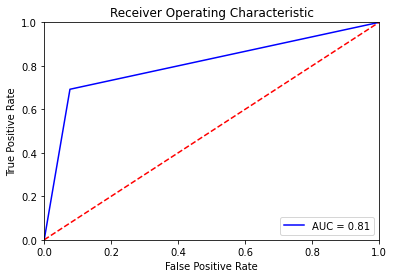

In [140]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size=0.3, 
                                                    random_state=104) 
m_svm = clf.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, m_svm)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0, 0.5, 'Accuracy Score')

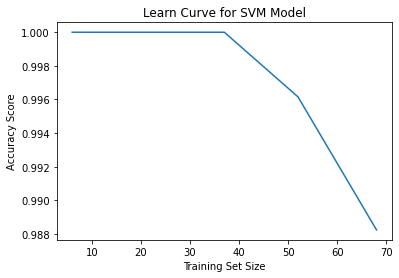

In [142]:
# Learn rate Curve
# uses k-cross validation = 5 by default
train_sizes, train_scores, test_scores = learning_curve(estimator = SVC(), 
                                                        X = data, 
                                                        y = labels,
                                                        cv=5,
                                                        scoring='accuracy',
                                                        n_jobs=-1)

plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.title("Learn Curve for SVM Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")

In [ ]:
# Interpretation of Results 
It seems that 

# SVM - Feature Selection
- finish this
- [Back To Top](#Index)
- [Models](#Models)

In [177]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=100) 
# 70% training and 30% test

#Predict the response for test dataset
y_pred = clf.predict(X_test)
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)


# Fitting logistic regression to the training set
Classifier = LogisticRegression(random_state=0)
Classifier.fit(x_train, y_train)
# get values, returns a series object with index and keys fields, more can be found 
# here https://pandas.pydata.org/docs/reference/api/pandas.Series.keys.html

feature_imp = pd.Series(clf.feature_importances_,index=train_data.columns).sort_values(ascending=False)

# keep top 10 values
top_ten_features = feature_imp.nlargest(10, keep='all')
top_ten_features
# print(top_ten_features.keys())

%matplotlib inline
# Creating a bar plot
sns.barplot(x=top_ten_features, y=top_ten_features.index)
# labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
# the legend works but takes up space and isnt needed
# plt.legend(top_ten_features.keys())
plt.show()

# Im not sure what these features are specifically 

####################
# Model Evaluation #
####################
print ('Model Evaluation')
# Model Accuracy: how often is the classifier correct
print("Model Accuracy:", round(metrics.accuracy_score(y_test, m_randomForest), 3))
# Model Precision: what percentage of positive tuples are labeled as such
print("Model Precision:", round(metrics.precision_score(y_test, m_randomForest), 3))
# Model Recall: what percentage of positive tuples are labelled as such
print("Model Recall:", round(metrics.recall_score(y_test, m_randomForest), 3))
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print('F1 Score: ', round(f1_score(y_test, m_randomForest, average="macro"), 3))

print('Cohens Kappa :', round(cohen_kappa_score(y_test , m_randomForest), 3))
# Combination of Accuracy, Precision, Recall 
print("Classification Report :\n", classification_report(y_test, m_randomForest))

cvs= cross_val_score(clf, data, labels, cv=10)

print('K-fold Cross Validation scores:')
print('Max Score: ', round(max(cvs), 3))
print('Min Score: ', round(min(cvs), 3))
print('Mean Score :', round(mean(cvs), 3))


##############################
# Testing model on test data #
##############################

X_test, y_test = train_test_split(test_data_df[top_ten_labels].transpose(), test_size=0.3, random_state=114) # 70% training and 30% testprint("after split check", len(X_test),  len(y_test))
y_pred = clf.predict(X_test)
# probability preformed really bad, so i think 0 or 1 is a better 
# y_predict_proba = clf.predict_proba(test_data_df)
submition_csv['Probability'] = y_pred
submition_csv
submition_csv.to_csv('test_submition.csv', index=False)

top_ten_labels = train_data[top_ten_features.keys()].keys()
top_ten_data = train_data[top_ten_features.keys()].values.transpose()
print(top_ten_data.shape)
print(top_ten_labels.shape)
print(test_data_df.shape)
print(test_data_df[top_ten_labels].transpose().shape)
test_data_df[top_ten_labels]

ValueError: Number of features of the model must match the input. Model n_features is 86 and input n_features is 410 

# Random Forest 
- Kaggle best 73%
- [Back To Top](#Index)
- [Models](#Models)

In [227]:
# random state yielded the best local result
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size=0.3, 
                                                    random_state=100)

#Create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(X_train,y_train)

m_random_forest = clf.predict(X_test)

####################
# Model Evaluation #
####################
print ('Model Evaluation')
# Model Accuracy: how often is the classifier correct
print("Model Accuracy:", round(metrics.accuracy_score(y_test, m_random_forest), 3))
# Model Precision: what percentage of positive tuples are labeled as such
print("Model Precision:", round(metrics.precision_score(y_test, m_random_forest), 3))
# Model Recall: what percentage of positive tuples are labelled as such
print("Model Recall:", round(metrics.recall_score(y_test, m_random_forest), 3))
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print('F1 Score: ', round(f1_score(y_test, m_random_forest, average="macro"), 3))

print('Cohens Kappa :', round(cohen_kappa_score(y_test , m_random_forest), 3))
# Combination of Accuracy, Precision, Recall 
print("Classification Report :\n", classification_report(y_test, m_random_forest))

cvs = cross_val_score(clf, data, labels, cv=10)

print('K-fold Cross Validation scores:')
print('Max Score: ', round(max(cvs), 3))
print('Min Score: ', round(min(cvs), 3))
print('Mean Score :', round(mean(cvs), 3))


##############################
# Testing model on test data #
##############################

X_test, y_test = train_test_split(test_data_df, test_size=1, random_state=100) # 70% training and 30% testprint("after split check", len(X_test),  len(y_test))
m_random_forest = clf.predict(test_data_df)
# probability preformed really bad, so i think 0 or 1 is a better 
# y_predict_proba = clf.predict_proba(test_data_df)
submition_csv['Probability'] = m_random_forest
submition_csv
submition_csv.to_csv('m_random_forest_submition.csv', index=False)

Model Evaluation
Model Accuracy: 0.808
Model Precision: 0.8
Model Recall: 0.727
F1 Score:  0.8
Cohens Kappa : 0.601
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.80      0.73      0.76        11

    accuracy                           0.81        26
   macro avg       0.81      0.80      0.80        26
weighted avg       0.81      0.81      0.81        26

K-fold Cross Validation scores:
Max Score:  0.889
Min Score:  0.556
Mean Score : 0.711


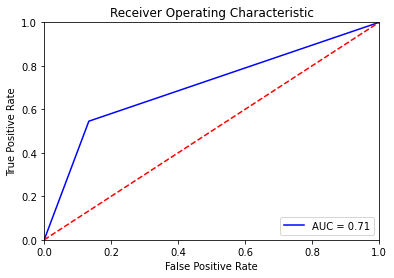

In [242]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size=0.3, 
                                                    random_state=100) 
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
m_randomForest = clf.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, m_randomForest)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0, 0.5, 'Accuracy Score')

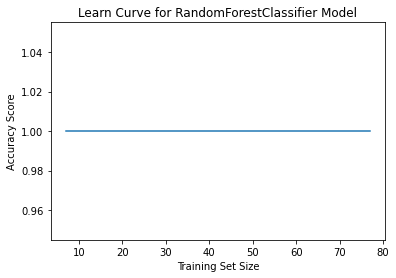

In [249]:
# Learn rate Curve
# uses k-cross validation = 5 by default
train_sizes, train_scores, test_scores = learning_curve(estimator = RandomForestClassifier(), 
                                                        X = data, 
                                                        y = labels,
                                                        cv=10,
                                                        scoring='accuracy',
                                                        n_jobs=-1)

plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.title("Learn Curve for SVM Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")

# Neural Network
- Kaggle best 0.0%
- [Back To Top](#Index)
- [Models](#Models)

In [259]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(X,y)


print("Best parameters set found on development set:")
print(clf.best_params_)

###########################################
# Neural Network Model -  #
###########################################

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size= 0.3, random_state=2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(random_state=0, max_iter=100)

mlp.fit(X_train_scaled, y_train)
m_nn = mlp.predict(scaler.transform(test_data_df))

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test))) 
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

cvs = cross_val_score(mlp, data, labels, cv=10)

print('K-fold Cross Validation scores:')
print('Max Score: ', round(max(cvs), 3))
print('Min Score: ', round(min(cvs), 3))
print('Mean Score :', round(mean(cvs), 3))

submition_csv['Probability'] = m_nn
submition_csv
submition_csv.to_csv('m_nn_submition.csv', index=False)

Accuracy on training set: 1.000
Accuracy on test set: 0.769


C:\Users\Grim\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Grim\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Grim\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Grim\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Grim\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

K-fold Cross Validation scores:
Max Score:  0.889
Min Score:  0.444
Mean Score : 0.724


# LinearDiscriminantAnalysis Model
- Kaggle best 68.4%
- [Back To Top](#Index)
- [Models](#Models)

In [20]:
# look up https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=109) # 70% training and 30% test
#Create a LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
linear_disc_analysis_m = clf.predict(X_test)

####################
# Model Evaluation #
####################
# read again, refresh memory https://www.jeremyjordan.me/evaluating-a-machine-learning-model/
# read up on random_state=109 why, without it model is bad 
# https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

print ('Model Evaluation')

# Model Accuracy: how often is the classifier correct
print("Model Accuracy:", round(metrics.accuracy_score(y_test, linear_disc_analysis_m), 3))

# Model Precision: what percentage of positive tuples are labeled as such
print("Model Precision:", round(metrics.precision_score(y_test, linear_disc_analysis_m), 3))

# Model Recall: what percentage of positive tuples are labelled as such
print("Model Recall:", round(metrics.recall_score(y_test, linear_disc_analysis_m), 3))


##############################
# Testing model on test data #
##############################

X_test, y_test = train_test_split(test_data_df, test_size=1, random_state=109) # 70% training and 30% testprint("after split check", len(X_test),  len(y_test))
linear_disc_analysis_m = clf.predict(test_data_df)
# probability preformed really bad, so i think 0 or 1 is a better 
# y_predict_proba = clf.predict_proba(test_data_df)
submition_csv['Probability'] = linear_disc_analysis_m
submition_csv
submition_csv.to_csv('test_submition.csv', index=False)


Model Evaluation
Model Accuracy: 0.692
Model Precision: 0.625
Model Recall: 0.833


# Model Evaluation Visualisations

* [Back To Top](#Index)
    * [Roc](#Roc)
    * [Learn Rate](#Learn-Rate)
    * [idk](#idk)
    * [idk2](#idk2)

# Roc
- [Back To Top](#Index)
- [Model Evaluation Visualisations](#Model-Evaluation-Visualisations)

In [23]:
fprS, tprS, t = roc_curve(y_test, y_score)
roc_aucS = auc(fprS, tprS)

%matplotlib inline
plt.figure()
lw = 2
plt.plot(fprG, tprG, color='red',
         lw=lw, label='ROC NB (area = %0.2f)' % roc_aucG)
plt.plot(fprD, tprD, color='green',
         lw=lw, label='ROC Dtree (area = %0.2f)' % roc_aucD)
plt.plot(fprS, tprS, color='grey',
         lw=lw, label='ROC SVM (area = %0.2f)' % roc_aucS)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis for Hotel Review data')
plt.legend(loc="lower right")
plt.show()

NameError: name 'roc_curve' is not defined

# Learn Rate
- [Back To Top](#Index)
- [Model Evaluation Visualisations](#Model-Evaluation-Visualisations)

In [ ]:
reps=300
num = 30
ho_s = []
s_s = []
for i in range(1,num):
    s = i/num
    for j in range(reps):
        ss =[]
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = s)
        y_pred = dtree.fit(X_train, y_train).predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        ss.append(acc)
    ho_s.append(mean(ss))
    s_s.append(s)
    
ho_s = pd.DataFrame(ho_s, index = s_s, columns = ['Hold Out'])
ax = ho_s.plot()
ax.set_xlabel("Train Set Proportion")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy: Train Set Size")

# idk
- [Back To Top](#Index)
- [Model Evaluation Visualisations](#Model-Evaluation-Visualisations)

In [ ]:
xv = []
for i in range(reps):
    kf = KFold(n_splits=10, shuffle = True) # needed to ensure shuffling
    scores = cross_val_score(dtree, X, y, cv=kf)
    xv.append(scores.mean())
    
    
    
res = pd.DataFrame(ho, columns = ['Hold Out'])
res['X Val']=xv
%matplotlib inline
ax = res.plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy: Hold Out and X Val")

# idk2
- [Back To Top](#Index)
- [Model Evaluation Visualisations](#Model-Evaluation-Visualisations)

In [ ]:
# data vis block
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_dash, classes=['Not Helpful','Helpful'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_dash, classes=['Not Helpful','Helpful'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()